# Reproduce: Qubit-oscillator dynamics in the dispersive regime

### Analytic theory beyond the rotating-wave approximation

D. Zueco, G. M. Reuther, S. Kohler, and P. Hänggi, <a href="http://journals.aps.org/pra/abstract/10.1103/PhysRevA.80.033846">Phys. Rev. A <b>80</b>, 033846 (2009).</a>


Reproduced by <b>Eunjong Kim</b> (<a href="mailto:ekim7206@gmail.com">ekim7206@gmail.com</a>)

## Setup Modules

In [1]:
from sympy import *
init_printing()

In [2]:
from sympsi import *
from sympsi.boson import BosonOp
from sympsi.pauli import (SigmaX, SigmaY, SigmaZ,
                          SigmaPlus, SigmaMinus)

## The Jaynes-Cummings Model

The Jaynes-Cummings model describes the light-matter interaction as a single harmonic oscillator and a two-level system. Within dipole approximation, the model is expressed by the Hamiltonian

\begin{align}
H = \frac{\hbar\epsilon}{2}\sigma_z + \hbar\omega a^\dagger a + \hbar g \sigma_x (a + a^\dagger)
\end{align}

where $\hbar\epsilon$ is the level splitting of the two-level system, henchforth <i>qubit</i>, $\omega$ is the frequency of the EM field mode, and $g$ is the dipole interaction strength.

Here, $\sigma_\alpha$, $\alpha=x, y, z$, are Pauli spin matrices
\begin{align}
\sigma_{x} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},\quad
\sigma_{y} = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
\sigma_{z} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix},
\end{align}

and $a^\dagger$, $a$ are bosonic creation and annihilation operators of the EM field mode.

To represent the Jaynes-Cummings model in SymPy, we use the operator classes <tt>BosonOp</tt> and <tt>SigmaX</tt>, <tt>SigmaY</tt>, and <tt>SigmaZ</tt>, and use these to construct the Hamiltonian (we work in units where $\hbar = 1$).

In [3]:
w, e, g, D, t, Hsym = symbols("omega, epsilon, g, Delta, t, H")
sx, sy, sz = SigmaX(), SigmaY(), SigmaZ()
a = BosonOp("a")

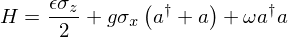

In [4]:
H0 = w * Dagger(a) * a + e / 2 * sz
Hint = g * sx * (a + Dagger(a))
H = H0 + Hint
Eq(Hsym, H)

This Hamiltonian cannot be diagonalized exactly, and is often simplified by a rotating-wave approximation(RWA).

We express the qubit-cavity interaction terms of the ladder operators $\sigma_{\pm} = \frac{1}{2}(\sigma_x \pm i\sigma_y)$. In the language of SymPy, these operators are written as:

In [5]:
sp, sm = SigmaPlus(), SigmaMinus()

We move to a frame co-rotating with the qubit and oscillator frequency.

In [6]:
U1 = exp(I * w * t * Dagger(a) * a); Eq(symbols("U_1"), U1)

In [7]:
U2 = exp(I * e * t * sz / 2); Eq(symbols("U_2"), U2)

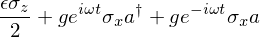

In [8]:
H1 = hamiltonian_transformation(U1, H.expand()); H1

In [9]:
H2 = hamiltonian_transformation(U2, H1.expand()); H2

In [10]:
H3 = pauli_represent_minus_plus(H2).rewrite((sin,cos), exp).expand()
H3 = powsimp(H3); H3

In [11]:
# Trick to simplify exponents
def simplify_exp(e):
    if isinstance(e, exp):
        return exp(simplify(e.exp.expand()))
    
    if isinstance(e, (Add, Mul)):
        return type(e)(*(simplify_exp(arg) for arg in e.args))
    
    return e

We introduce the detuning $\Delta = \epsilon - \omega$ and substitute into the expression

In [12]:
H4 = simplify_exp(H3).subs(e - w, D); H4

In the interaction picture, with respect to the uncoupled hamiltonian $H_0 = \hbar\epsilon\sigma_z/2 + \hbar\omega a^\dagger a$, the coupling operators $\sigma_+ a, \sigma_-a^\dagger$ and $\sigma_- a, \sigma_+ a^\dagger$ oscillate with the phase factors $\exp[\pm i(\omega-\epsilon)t]$ and $\exp[\pm i(\omega+\epsilon)t]$, respectively.

Operating at or near resonance, the cavity-qubit detuning is small, $|\epsilon-\omega|\ll\epsilon+\omega$, so that the former operators oscillate slowly, whereas the latter exhibit fast <i>counter-rotating</i> oscillations. If in addition, the coupling is sufficiently weak $g\ll \min\{\epsilon,\omega\}$, one can separate time scales and replace the counter-rotating terms by their vanishing time average.

We drop the fast oscillating terms containing the factors $e^{\pm i(\omega+\epsilon)t}$

In [13]:
H5 = drop_terms_containing(H4, [exp( I * (w + e) * t),
                                exp(-I * (w + e) * t)])
H5 = drop_c_number_terms(H5.expand())

H5

This is the Jaynes-Cummings model in the interaction picture. If we transform back to the Schrödinger picture, we have:

In [14]:
U3 = exp(-I * w * t * Dagger(a) * a)
H6 = hamiltonian_transformation(U3, H5); H6

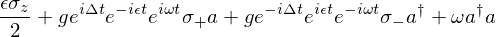

In [15]:
U4 = exp(-I * e * t * sz / 2)
H7 = hamiltonian_transformation(U4, H6.expand()); H7

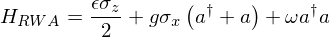

In [16]:
H8 = simplify_exp(H7).subs(D, e - w)

H8 = simplify_exp(powsimp(H8)).expand()

H8 = drop_c_number_terms(H8)

Hrwa = collect(H8, g)

Eq(symbols("H_RWA"), H)

This is the Jaynes-Cummings Hamiltonian.

## Dispersive Theory within RWA

The dispersive regime is characterized by a large detuning $\Delta = \epsilon - \omega$ as compared to the qubit-oscillator coupling $g$. Thus, the factor

\begin{align} \lambda\equiv\frac{g}{\Delta} \end{align}

is a small parameter, while the RWA Hamiltonian is valid for $|\epsilon - \omega|\ll \epsilon+\omega$.

It is easier if we separate the coupling term from the RWA Hamiltonian.

Defining the operators $X_{\pm} = \sigma_{-}a^\dagger \pm \sigma_{+}a$,

In [17]:
Xp = sm * Dagger(a) + sp * a; Eq(symbols("X_+"),Xp)

In [18]:
Xm = sm * Dagger(a) - sp * a; Eq(symbols("X_-"),Xm)

The RWA Hamiltonian is expressed as
\begin{align} H_{RWA} = H_0 + \hbar g X_+ \end{align}
where $H_0$ is the non-interacting Hamiltonian
\begin{align} H_0 \equiv \frac{\hbar\epsilon}{2} \sigma_z +\hbar\omega a^\dagger a
\end{align}

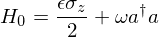

In [19]:
H0 = e/2 * sz + w * Dagger(a) * a; Eq(symbols("H_0"),H0)

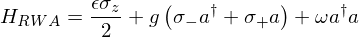

In [20]:
Hrwa = H0 + g * Xp; Eq(symbols("H_RWA"), Hrwa)

We apply the unitary transformation\begin{align}
D_{RWA} \equiv e^{- \lambda X_-} = e^{-\lambda(\sigma_- a^\dagger -\sigma_{+} a)}
\end{align}

to obtain the dispersive Hamiltonian $H_{RWA, \textrm{disp}} = D_{RWA} H_{RWA} D_{RWA}^\dagger$ to the second order in $\lambda$:
\begin{align}
H_{RWA, \textrm{disp}} = H_{RWA} + \lambda [H_{RWA}, X_-] + \frac{1}{2}\lambda^2 [[H_{RWA},X_-],X_-]
\end{align}

In the language of SymPy,

In [21]:
l = symbols("lambda", real = True)
Drwa = exp(-l * Xm); Eq(symbols("D_RWA"), Drwa)

The transformed Hamiltonian is:

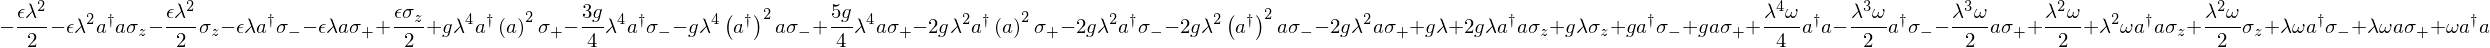

In [22]:
H1 = hamiltonian_transformation(Drwa, Hrwa.expand(), expansion_search=False, N=3).expand()

H1 = qsimplify(H1)

H1

We drop the terms of orders in lambda higher than 2.

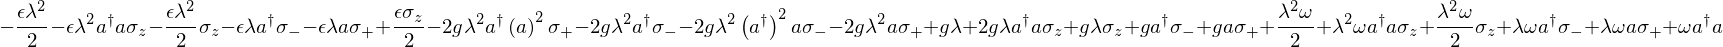

In [23]:
H2 = drop_terms_containing(H1.expand(), [l**3, l**4]); H2

and substitute $g/\Delta$ in place of $\lambda$.

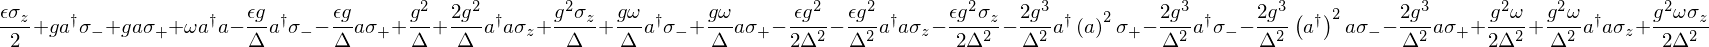

In [24]:
H3 = H2.subs(l, g/D); H3

We also drop c-number terms

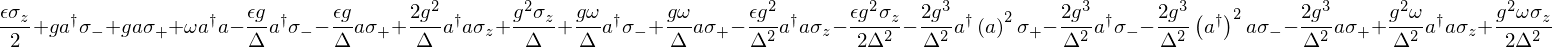

In [25]:
H4 = drop_c_number_terms(H3); H4

and collect the terms with $a^\dagger a$ and $\sigma_z$.

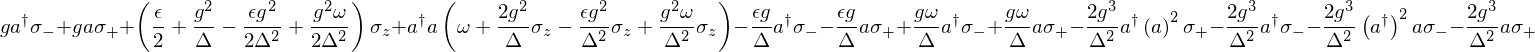

In [26]:
H5 = collect(H4, [Dagger(a)*a, sz]); H5

Now move to a frame co-rotating with the qubit and oscillator frequencies:

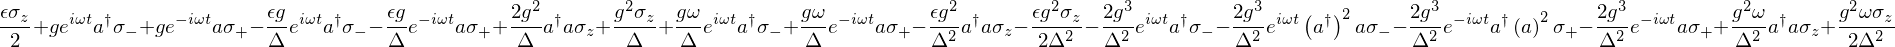

In [27]:
H6 = hamiltonian_transformation(U1, H5.expand()); H6

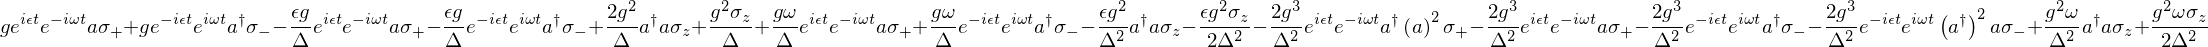

In [28]:
H7 = hamiltonian_transformation(U2, H6.expand()); H7

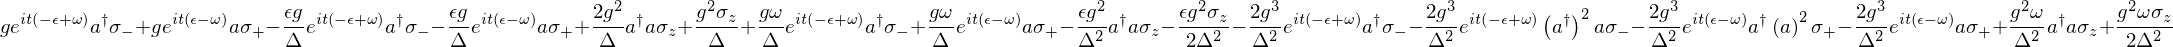

In [29]:
H7 = simplify_exp(powsimp(H7)); H7

Since the absolute value of the detuning $\Delta = \epsilon-\omega$ is much larger than $g$ (equivalently, $|\lambda\ll 1|$), the exponential terms $e^{i(\epsilon-\omega)t}$, $e^{-i(\epsilon-\omega)t}$ are now considered fast oscillating and can be ignored.

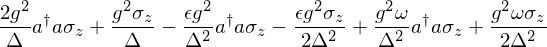

In [30]:
H8 = drop_terms_containing(H7, [exp(I * (e - w) * t), exp(I * (- e + w) * t)])

H8

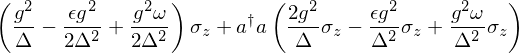

In [31]:
H9 = qsimplify(H8)

H9 = collect(H9, [Dagger(a)*a, sz])

H9

Now we move back to the lab frame:

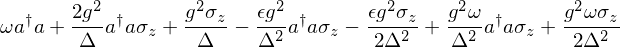

In [32]:
H10 = hamiltonian_transformation(U3, H9.expand()); H10

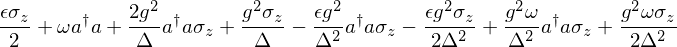

In [33]:
H11 = hamiltonian_transformation(U4, H10.expand()); H11

Simplifying the expression, and collecting the terms of $\sigma_z$ and $a^\dagger a$, with substitution $\Delta = \epsilon-\omega$, we get the expression for the Hamiltonian in the dispersive regime.

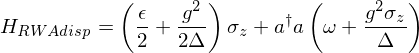

In [34]:
H12 = qsimplify(H11)

H12 = collect(H12, [Dagger(a) * a, sz])

Hrwadisp = H12.subs(w, e - D).expand().collect([Dagger(a)*a, sz]).subs(e - D, w)

Eq(symbols("H_RWAdisp"), Hrwadisp)

The physical interpretation of this equation is that the oscillator frequency is shifted as
\begin{align}
\omega \rightarrow \omega\pm \frac{g^2}{\Delta}
\end{align}
where the sign depends on the state of the qubit.

## Dispersive Theory Beyond RWA

To treat the original Hamiltonian (not the RWA Hamiltonian) \begin{align}
H = \frac{\hbar\epsilon}{2}\sigma_z + \hbar\omega a^\dagger a + \hbar g \sigma_x (a^\dagger + a)
\end{align}

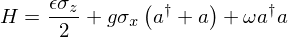

In [35]:
Eq(Hsym, H)

in the dispersive regime correctly. That is, we derive the expression valid in the full dispersive regime defined only by inequality
\begin{align}
g\ll |\epsilon -\omega|.
\end{align}

Going beyond RWA, we have to keep the counter-rotating coupling terms
\begin{align}
Y_{\pm} =  \sigma_- a  \pm\sigma_+ a^\dagger,
\end{align}
which are relevant if either of the relations $g\ll \min\{\epsilon,\omega\}$ or $|\epsilon-\omega|\ll \epsilon+\omega$ is violated.

In [36]:
Yp = sm * a + sp * Dagger(a)
Ypsym = symbols("Y_+")
Eq(Ypsym,Yp)

In [37]:
Ym = sm * a - sp * Dagger(a)
Ymsym = symbols("Y_-")
Eq(Ymsym,Ym)  # different from the definition in the paper

These operators satify the following commutation relations:

$[Y_+, Y_-] = \sigma_z (2a^\dagger a + 1) -1$

In [38]:
comm = Commutator(Yp, Ym).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
comm = simplify(comm.subs(2*sm*sp, (1-sz)))
collect(comm, [sz, 1])

$[H_0, Y_-] = -(\epsilon+\omega) Y_+ $

In [39]:
comm = Commutator(H0, Ym).expand(commutator=True).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
comm = qsimplify(comm)
comm = collect(comm, [a*sm, Dagger(a)*sp])
simplify(comm)

$[Y_+, X_-] = \sigma_z \left\{a^2 + (a^\dagger)^2\right\} $

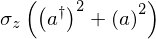

In [40]:
comm = Commutator(Yp, Xm).expand(commutator=True).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
collect(comm, [sz])

$[Y_-, X_+] = -\sigma_z \left\{a^2 + (a^\dagger)^2\right\} $

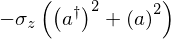

In [41]:
comm = Commutator(Ym, Xp).expand(commutator=True).expand(commutator=True).expand(commutator=True).expand(commutator=True).doit()
simplify(collect(comm, [sz]))

We separate the qubit-oscillator coupling from the bare terms and rewrite the Hamiltonian as
\begin{align}
H = H_0 + \hbar g X_+ + \hbar g Y_+
\end{align}

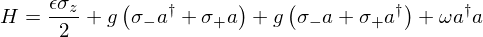

In [42]:
H = H0 + g * Xp + g * Yp; Eq(symbols("H"),H)

A unitary transformation corresponding to this Hamiltonian is achieved by the operator
\begin{align}
D = e^{-\lambda_1 X_- - \lambda_2 Y_-}
\end{align}

Here, we have introduced the parameters
\begin{align}
\lambda_1 \equiv \frac{g}{\Delta},\quad \lambda_2  \equiv \frac{g}{\epsilon+\omega} = \frac{g}{2\epsilon -\Delta},
\end{align}
which obviously fulfills the relation $\lambda_2<\lambda_1$, since $\epsilon$ and $\omega$ are assumed to be positive.

In [43]:
l1, l2 = symbols("lambda1, lambda2", real=True)
Disp = exp(-l1 * Xm - l2 * Ym); Eq(symbols("D"), Disp)

We define the dispersive Hamiltonian $H_{disp} = DHD^\dagger$.

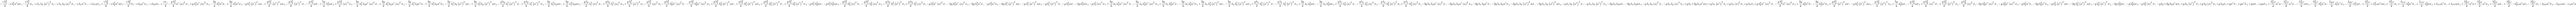

In [44]:
H1 = hamiltonian_transformation(Disp, H.expand(), expansion_search=False, N=3).expand()

H1 = qsimplify(H1).expand()

H1

First, we only leave the terms with $\lambda_1, \lambda_2$ up to the second order.

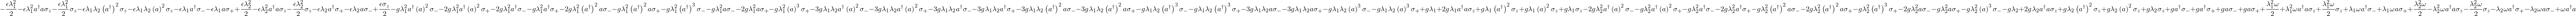

In [45]:
H2 = drop_terms_containing(H1.expand(), [l1**3, l1 * l2**2, l1**2 * l2, l2**3,
                                         l1**4, l1**3 * l2, l1**2 * l2**2, l1 * l2**3,  l2**4]); H2

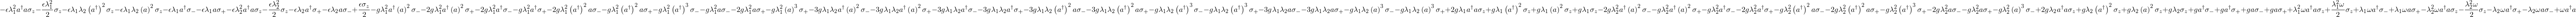

In [46]:
H3 = drop_c_number_terms(H2)
H4 = qsimplify(H3)
H4

Move to a frame co-rotating with the qubit-oscillator system.

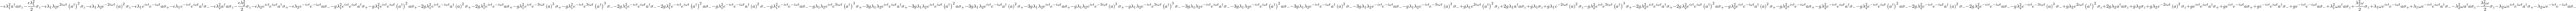

In [47]:
H5 = hamiltonian_transformation(U1, H4)
H6 = hamiltonian_transformation(U2, H5)

H6

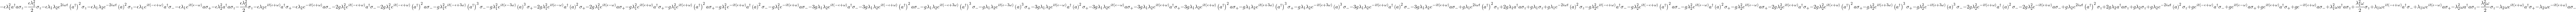

In [48]:
H6 = powsimp(H6)
H7 = simplify_exp(H6)

H7

Since we have assumed that the detuning $\Delta = \epsilon-\omega$ is much larger than the coupling frequency $g$, it is okay to ignore terms oscillating fast in the co-rotating system. i.e., $e^{\pm i(\epsilon-\omega)t}, e^{\pm i(\epsilon+\omega)t}, e^{\pm i(\epsilon+3\omega)t}$.

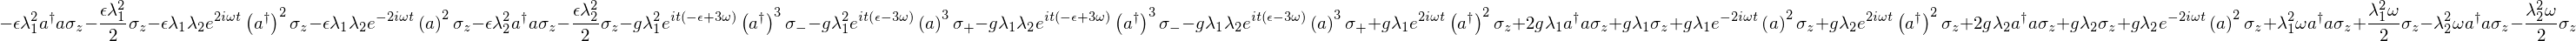

In [49]:
H8 = drop_terms_containing(H7, [exp(I * (e-w)* t), exp(I * (-e+w)* t),
                                exp(I * (e+w)* t), exp(-I * (e+w)* t),
                                exp(I * (e+3*w)* t), exp(-I * (e+3*w)* t),
                                ])
H8 = drop_c_number_terms(H8)
H8

The terms associated with the exponents $e^{\pm2i\omega t}, e^{\pm i(\epsilon-3\omega)}$ are not to be neglected in this case, because we are only with the large detuning condition $g\ll |\epsilon-\omega|$. (For instance, if $\omega\ll g$, $e^{\pm 2i\omega t}$ term is oscillating slowly and cannot be ignored. In addition, even if $\omega\gg g$, this term has no significant effect whether or not we include in the sum. So, it is necessary that we include this term in the summation.)

We move back to the lab frame:

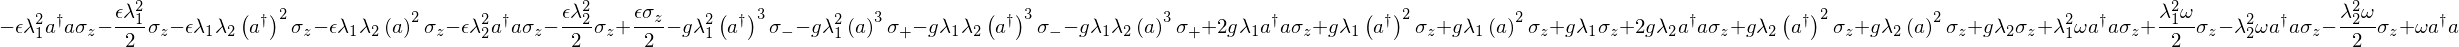

In [50]:
H9  = hamiltonian_transformation(U3, H8)
H10 = hamiltonian_transformation(U4, H9)

H10 = qsimplify(H10.expand())

H10

In [51]:
D_ = Symbol("\Delta'", real=True) # D_ = e + w = 2 * e - D

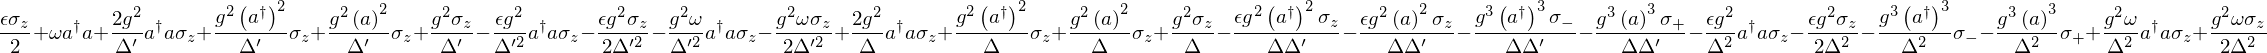

In [52]:
H10.subs({l1: g/D, l2: g/D_})

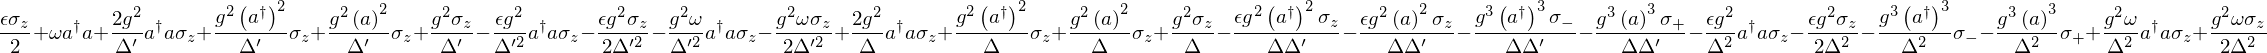

In [53]:
H11 = H10.subs({l1: g/D, l2: g/D_})
H11

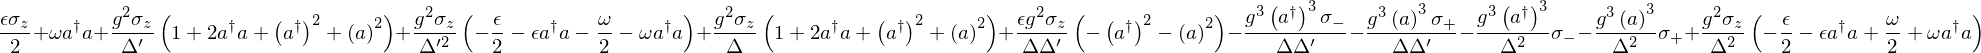

In [54]:
H12 = collect(H11, [g**2*sz*e/(D*D_), 
                    g**2*sz/D_, g**2*sz/D])

H12

The terms containing $a^3, (a^\dagger)^3$ has a higher order of $\lambda_1 = g/\Delta, \lambda_2 = g/(2\epsilon-\Delta)$, so that these can be ignored:

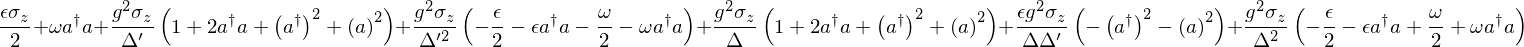

In [55]:
H13 = drop_terms_containing(H12, [a**3, Dagger(a)**3]); H13

We use the familiar relation of fractions:
\begin{align}
\frac{\epsilon}{\Delta \Delta' }
=\frac{\epsilon}{\Delta(2\epsilon-\Delta)}
=\frac{1}{2\Delta} + \frac{1}{2(2\epsilon-\Delta)}
=\frac{1}{2\Delta} + \frac{1}{2\Delta'}
\end{align}

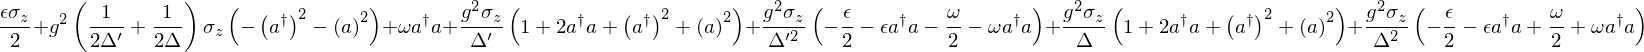

In [56]:
H14 = H13.subs(e / (D * D_), 1/(2*D) + 1/(2*D_))
H14

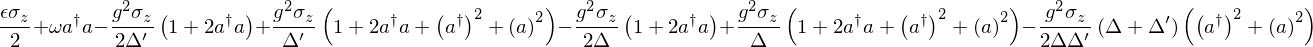

In [57]:
H15 = Add(*[simplify(Mul(*[f.factor() for f in t.args])) for t in H14.args]).subs({e-w: D, e+w: D_})
H15

for simplicity, let $A = a^\dagger + a$

In [58]:
A = Operator('A')  # a + Dagger(a)
Asq = qsimplify(((a + Dagger(a))**2).expand())

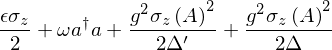

In [59]:
H16 = H15.subs({Asq: A**2,
                1 + 2 * Dagger(a) * a: A**2 - a**2 - Dagger(a)**2}).expand()
H16

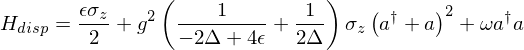

In [60]:
H17 = collect(H16, g**2*sz*A).subs({A: a + Dagger(a),
                                    D_: 2 * e - D})

Eq(Symbol("H_disp"), H17)

This is the dispersive Hamiltonian obtained without regard to the RWA Hamiltonian in the beginning. The prefactor of the coupling has a contribution arising not only from $\lambda_1 = g/\Delta$, but also from $\lambda_2=g/(2\epsilon-\Delta)$. Also, the coupling is proportional to $(a^\dagger + a)^2$. 

This Hamiltonian is not diagonal in the eigenbasis of the uncoupled Hamiltonian $H_0$. Nevertheless, it is still possible to interpret this result as a qubit-state dependent frequency shift.

Interpreting $\hbar\omega a^\dagger a$ as the Hamiltonian of a particle with unit mass in the potential $\frac{1}{2}\omega^2 x^2$, where $x=\sqrt{\frac{\hbar}{2\omega}}(a^\dagger+a)$. The qubit-oscillator coupling modifies the potential curvature $\omega^2$, such that the oscillator frequency undergoes a shift according to
\begin{align}
\omega \ \rightarrow \ \overline{\omega} = \omega\sqrt{1\pm \frac{2g^2}{\omega} \left( \frac{1}{\Delta} + \frac{1}{2\epsilon-\Delta}\right)}.
\end{align}
where the $\pm$ sign depends on the qubit state.

In the experimentally interesting parameter regime where $g<\omega$, we can expand this expression to obtain
\begin{align}
\overline{\omega} = \omega \pm g^2 \left( \frac{1}{\Delta} + \frac{1}{2\epsilon-\Delta}\right).
\end{align}